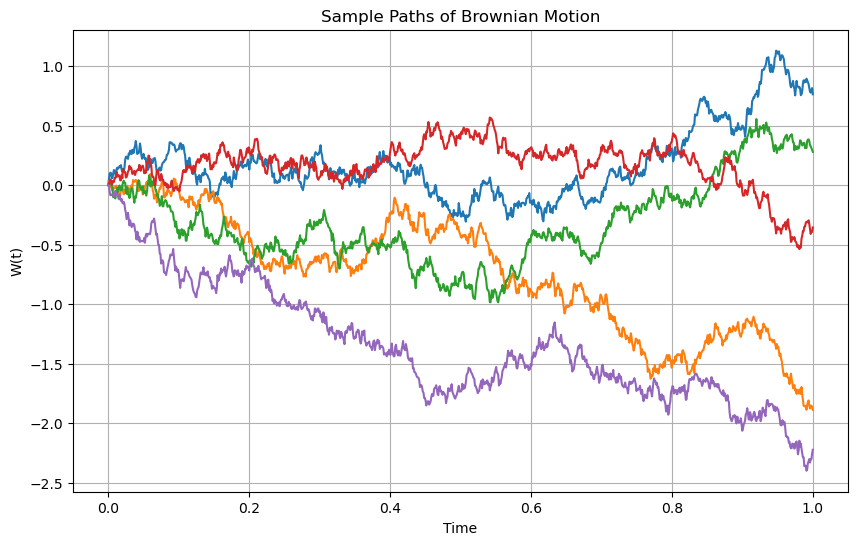

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_brownian_motion(T=1, N=1000, paths=5):
    """
    Simulate Brownian motion paths

    Parameters:
    -----------
    T : float
        Total time
    N : int
        Number of time steps
    paths : int
        Number of paths to simulate

    Returns:
    --------
    tuple: (time_points, simulated_paths)
    """
    dt = T/N
    t = np.linspace(0, T, N)
    dW = np.random.normal(0, np.sqrt(dt), (paths, N-1))
    W = np.cumsum(dW, axis=1)
    W = np.concatenate([np.zeros((paths, 1)), W], axis=1)

    return t, W

# Simulation and plotting
t, W = simulate_brownian_motion()
plt.figure(figsize=(10, 6))
for path in W:
    plt.plot(t, path)
plt.title('Sample Paths of Brownian Motion')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

## 1. Basic 2D Brownian Motion Visualization
Let's start by creating a clear visualization of two correlated Brownian motions with different correlation coefficients:

A two-dimensional Brownian motion is a vector-valued process $\mathbf{B}(t) = (B_1(t), B_2(t))$ where $B_1(t)$ and $B_2(t)$ are independent standard Brownian motions. When we consider correlated Brownian motions (as often happens in finance with correlated assets), we introduce correlation $\rho$ between the components.

The mathematical representation for correlated 2D Brownian motion is:
$\begin{pmatrix} dB_1(t) \\ dB_2(t) \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ \rho & \sqrt{1-\rho^2} \end{pmatrix} \begin{pmatrix} dW_1(t) \\ dW_2(t) \end{pmatrix}$

Let's visualize this with Python:

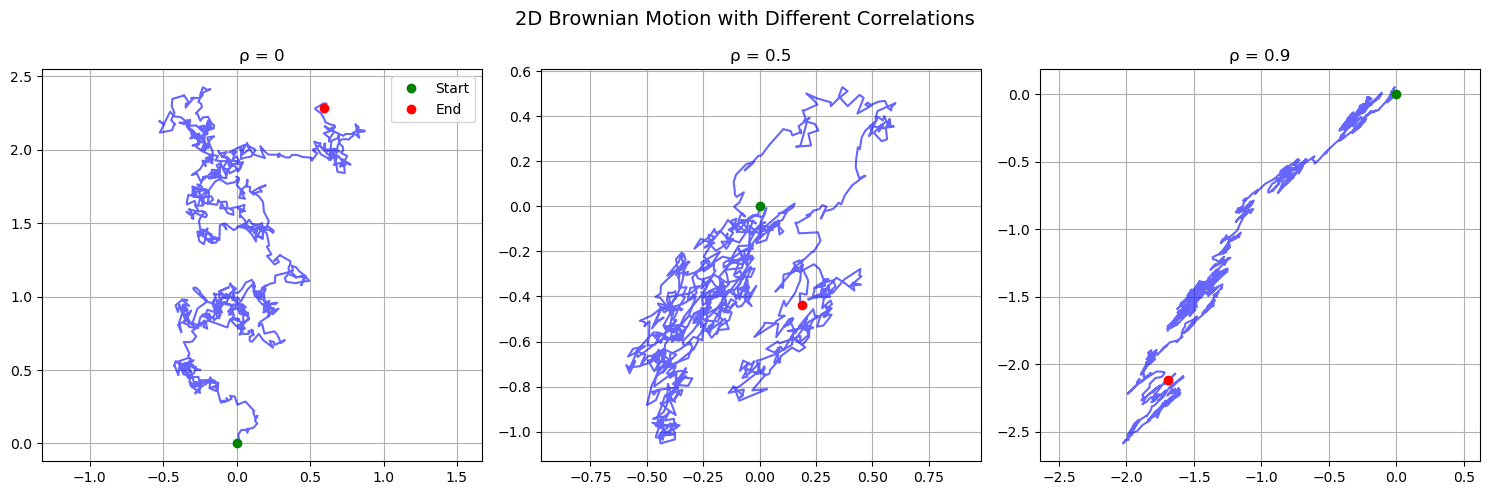

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def plot_correlated_brownian_motions(T=1, N=1000, correlations=[0, 0.5, 0.9]):
    """
    Visualize 2D Brownian motions with different correlations
    
    Parameters:
    -----------
    T : float
        Time horizon
    N : int
        Number of steps
    correlations : list
        List of correlation coefficients to visualize
    """
    dt = T/N
    times = np.linspace(0, T, N)
    
    fig, axes = plt.subplots(1, len(correlations), figsize=(15, 5))
    fig.suptitle('2D Brownian Motion with Different Correlations', fontsize=14)
    
    for idx, rho in enumerate(correlations):
        # Generate independent Brownian increments
        dW1 = np.random.normal(0, np.sqrt(dt), N-1)
        dW2 = np.random.normal(0, np.sqrt(dt), N-1)
        
        # Correlate the increments
        dB1 = dW1
        dB2 = rho * dW1 + np.sqrt(1-rho**2) * dW2
        
        # Cumulative sum
        B1 = np.cumsum(np.concatenate([[0], dB1]))
        B2 = np.cumsum(np.concatenate([[0], dB2]))
        
        # Plot
        axes[idx].plot(B1, B2, 'b-', alpha=0.6)
        axes[idx].plot(B1[0], B2[0], 'go', label='Start')
        axes[idx].plot(B1[-1], B2[-1], 'ro', label='End')
        axes[idx].set_title(f'ρ = {rho}')
        axes[idx].grid(True)
        axes[idx].axis('equal')
        
        if idx == 0:
            axes[idx].legend()
            
    plt.tight_layout()
    return plt

# Create visualization
np.random.seed(42)
plot_correlated_brownian_motions()
plt.show()

## 2. Heat Map Visualization of Path Density
Let's create a heat map to show where the Brownian motion spends most of its time:

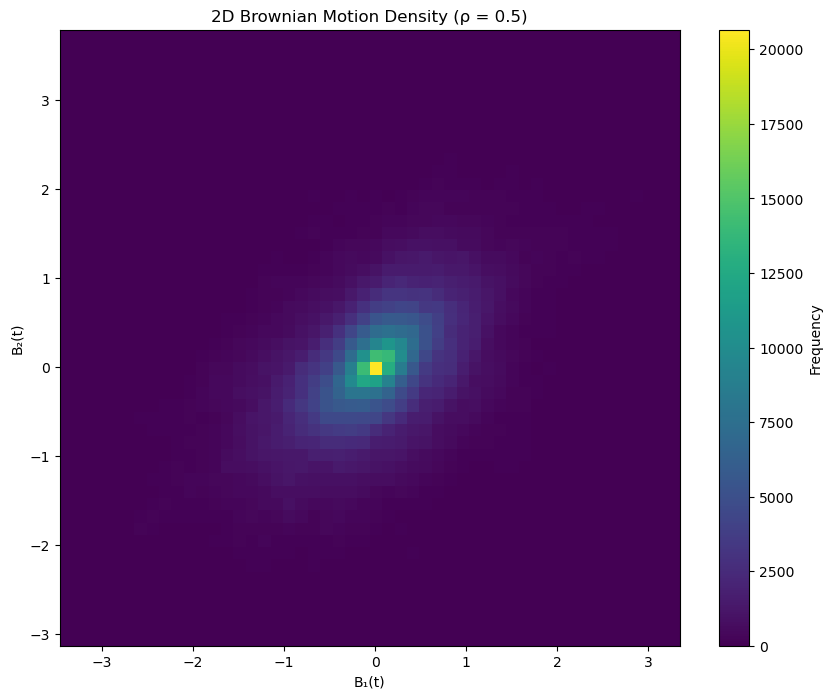

In [2]:
def plot_brownian_density(T=1, N=1000, n_paths=1000, rho=0.5):
    """
    Create a heat map of 2D Brownian motion path density
    """
    dt = T/N
    x_points = []
    y_points = []
    
    for _ in range(n_paths):
        dW1 = np.random.normal(0, np.sqrt(dt), N-1)
        dW2 = np.random.normal(0, np.sqrt(dt), N-1)
        
        dB1 = dW1
        dB2 = rho * dW1 + np.sqrt(1-rho**2) * dW2
        
        B1 = np.cumsum(np.concatenate([[0], dB1]))
        B2 = np.cumsum(np.concatenate([[0], dB2]))
        
        x_points.extend(B1)
        y_points.extend(B2)
    
    plt.figure(figsize=(10, 8))
    plt.hist2d(x_points, y_points, bins=50, cmap='viridis')
    plt.colorbar(label='Frequency')
    plt.title(f'2D Brownian Motion Density (ρ = {rho})')
    plt.xlabel('B₁(t)')
    plt.ylabel('B₂(t)')
    plt.show()

# Create density plot
np.random.seed(42)
plot_brownian_density()

## 3. Time Evolution Visualization
Let's create an animation-like visualization showing how the path evolves over time:

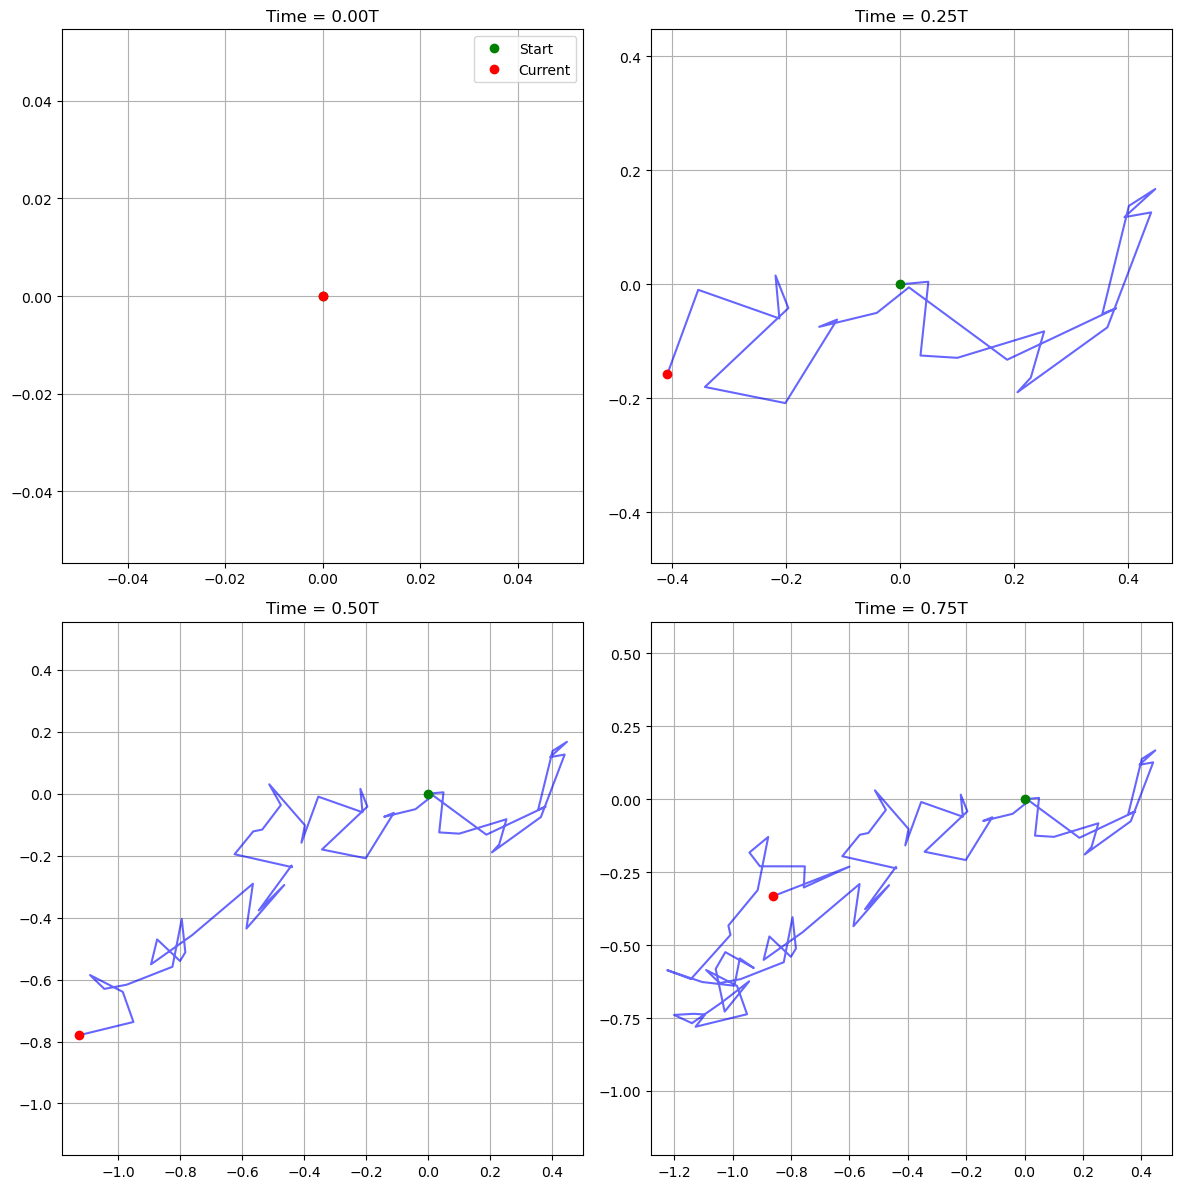

In [3]:
def plot_brownian_evolution(T=1, N=100, rho=0.5, n_snapshots=4):
    """
    Show evolution of 2D Brownian motion over time
    """
    dt = T/N
    dW1 = np.random.normal(0, np.sqrt(dt), N-1)
    dW2 = np.random.normal(0, np.sqrt(dt), N-1)
    
    dB1 = dW1
    dB2 = rho * dW1 + np.sqrt(1-rho**2) * dW2
    
    B1 = np.cumsum(np.concatenate([[0], dB1]))
    B2 = np.cumsum(np.concatenate([[0], dB2]))
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()
    
    snapshot_points = np.linspace(0, N, n_snapshots+1)[:-1].astype(int)
    
    for idx, n in enumerate(snapshot_points):
        axes[idx].plot(B1[:n+1], B2[:n+1], 'b-', alpha=0.6)
        axes[idx].plot(B1[0], B2[0], 'go', label='Start')
        axes[idx].plot(B1[n], B2[n], 'ro', label='Current')
        axes[idx].set_title(f'Time = {n/N:.2f}T')
        axes[idx].grid(True)
        axes[idx].axis('equal')
        if idx == 0:
            axes[idx].legend()
    
    plt.tight_layout()
    plt.show()

# Create evolution plot
np.random.seed(42)
plot_brownian_evolution()

## 4. Intersection Visualization
Let's visualize the intersections of two Brownian paths:

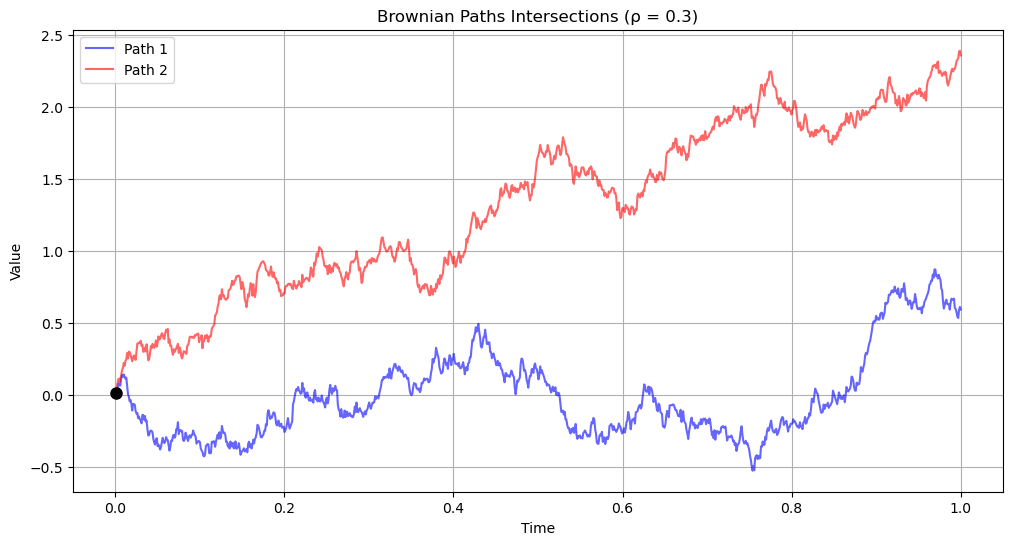

Number of intersections detected: 1


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_2d_brownian(T=1, N=1000, rho=0.3):
    """
    Simulate two correlated Brownian motions
    
    Parameters:
    -----------
    T : float
        Time horizon
    N : int
        Number of time steps
    rho : float
        Correlation coefficient between the two paths
        
    Returns:
    --------
    tuple: (times, path1, path2)
        times: array of time points
        path1: first Brownian path
        path2: second Brownian path
    """
    dt = T/N
    times = np.linspace(0, T, N)
    
    # Generate independent Brownian increments
    dW1 = np.random.normal(0, np.sqrt(dt), N-1)
    dW2 = np.random.normal(0, np.sqrt(dt), N-1)
    
    # Create correlated increments using Cholesky decomposition
    dB1 = dW1
    dB2 = rho * dW1 + np.sqrt(1-rho**2) * dW2
    
    # Construct paths through cumulative sum of increments
    B1 = np.concatenate([[0], np.cumsum(dB1)])
    B2 = np.concatenate([[0], np.cumsum(dB2)])
    
    return times, B1, B2

def plot_brownian_intersections(T=1, N=1000, rho=0.3, threshold=0.05):
    """
    Visualize intersections between two Brownian paths
    
    Parameters:
    -----------
    T : float
        Time horizon
    N : int
        Number of time steps
    rho : float
        Correlation coefficient
    threshold : float
        Distance threshold for considering paths as intersecting
        
    Returns:
    --------
    int: Number of intersections detected
    """
    # Generate the Brownian paths
    t, B1, B2 = simulate_2d_brownian(T, N, rho)
    
    # Find intersections by looking for sign changes in the difference
    intersections = []
    last_sign = np.sign(B1[0] - B2[0])
    
    for i in range(1, len(t)):
        current_sign = np.sign(B1[i] - B2[i])
        if current_sign != last_sign and abs(B1[i] - B2[i]) < threshold:
            intersections.append(i)
        last_sign = current_sign
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot the Brownian paths
    plt.plot(t, B1, 'b-', label='Path 1', alpha=0.6)
    plt.plot(t, B2, 'r-', label='Path 2', alpha=0.6)
    
    # Highlight intersection points
    for idx in intersections:
        plt.plot(t[idx], B1[idx], 'ko', markersize=8)
    
    # Add labels and styling
    plt.title(f'Brownian Paths Intersections (ρ = {rho})')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    
    plt.show()
    
    return len(intersections)

# Set random seed for reproducibility
np.random.seed(42)

# Create visualization and print number of intersections
n_intersections = plot_brownian_intersections()
print(f"Number of intersections detected: {n_intersections}")

These visualizations help us understand several key properties:

1. Correlation Effect: As correlation increases, the paths become more "parallel"
2. Density Distribution: The heat map shows the probability distribution of where the process is likely to be
3. Time Evolution: We can see how the uncertainty grows with √t
4. Intersections: Correlated paths intersect less frequently than uncorrelated ones

## Probability Density of a 2D Brownian Motion

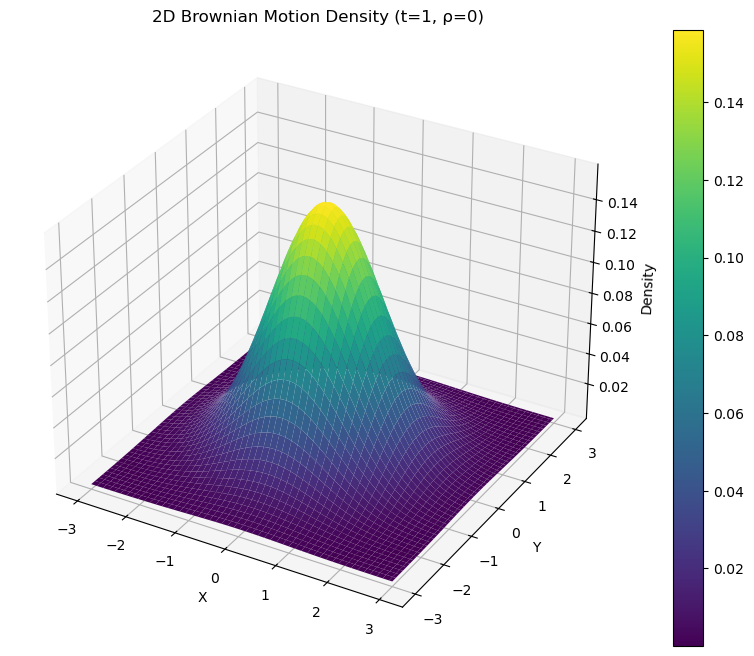

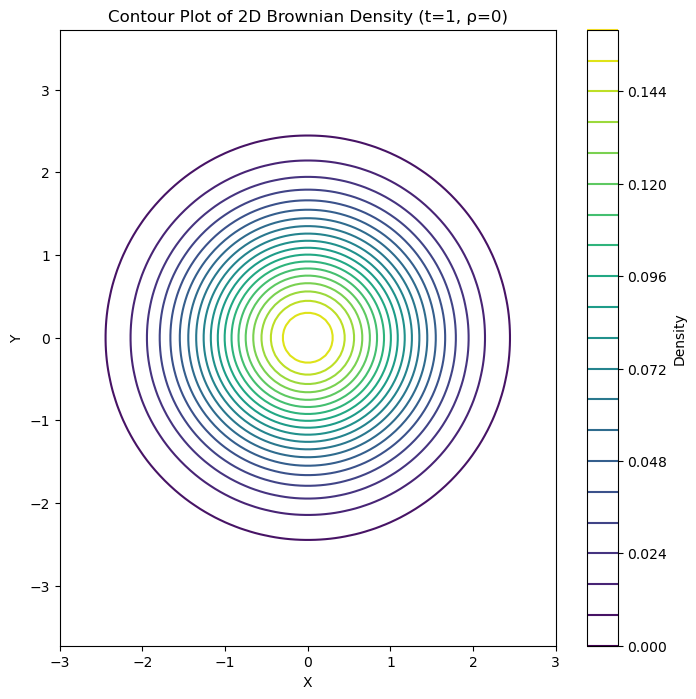

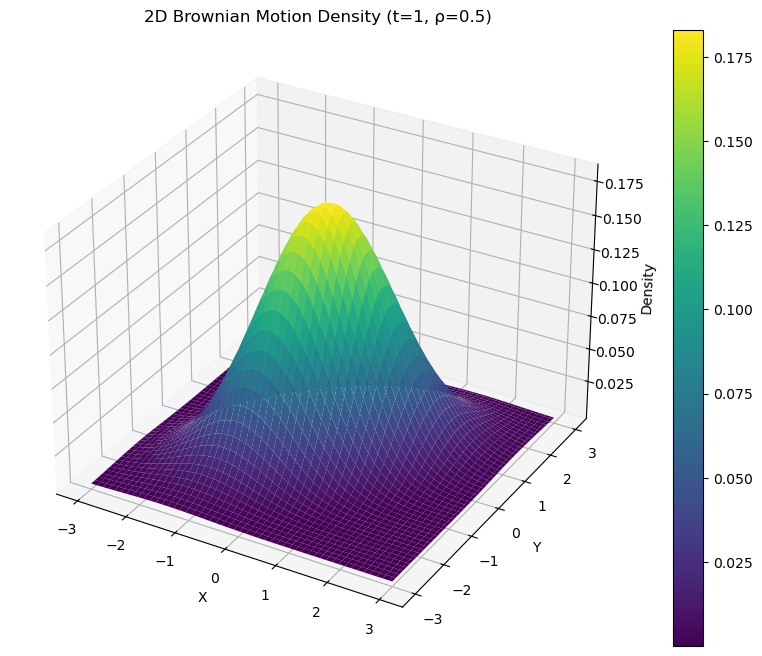

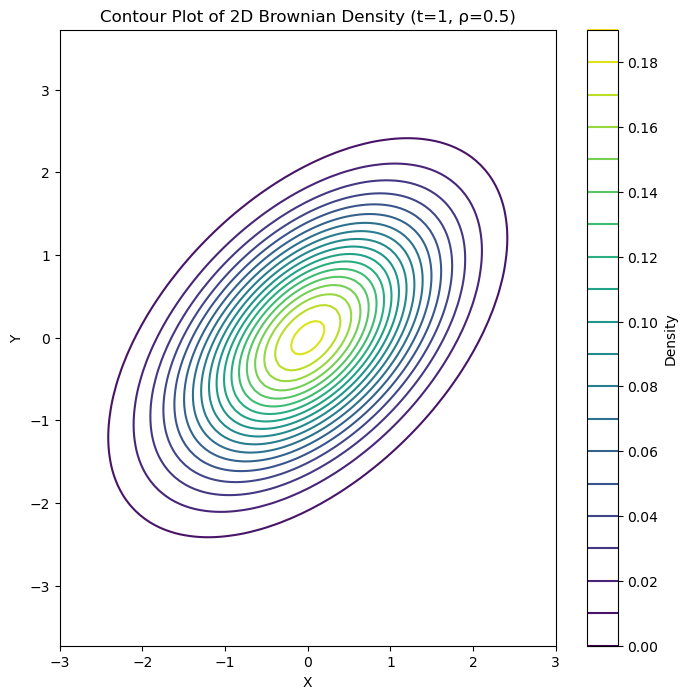

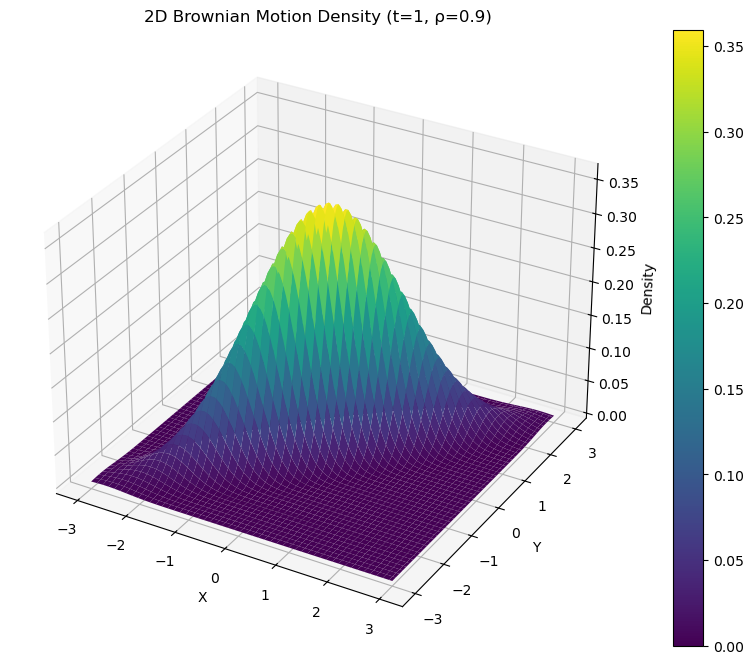

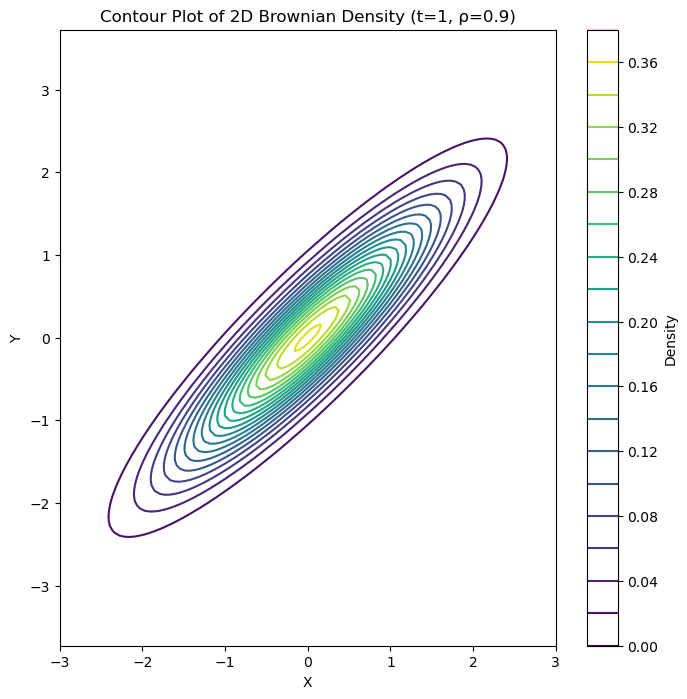

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

def plot_2d_brownian_density(t=1, rho=0, grid_size=100):
    """
    Visualize the probability density of 2D Brownian motion
    
    Parameters:
    -----------
    t : float
        Time point
    rho : float
        Correlation coefficient
    grid_size : int
        Resolution of the visualization grid
    """
    # Create grid points
    x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), grid_size)
    y = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), grid_size)
    X, Y = np.meshgrid(x, y)
    
    # Covariance matrix
    cov = t * np.array([[1, rho], [rho, 1]])
    
    # Calculate density
    pos = np.dstack((X, Y))
    rv = multivariate_normal([0, 0], cov)
    Z = rv.pdf(pos)
    
    # Create 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Density')
    ax.set_title(f'2D Brownian Motion Density (t={t}, ρ={rho})')
    
    plt.colorbar(surf)
    plt.show()
    
    # Also show contour plot
    plt.figure(figsize=(8, 8))
    plt.contour(X, Y, Z, levels=20)
    plt.colorbar(label='Density')
    plt.title(f'Contour Plot of 2D Brownian Density (t={t}, ρ={rho})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.show()

# Show density for different correlation values
for rho in [0, 0.5, 0.9]:
    plot_2d_brownian_density(rho=rho)

# First Exit Time Problems in Brownian Motion

Let's start with a simple visualization to build intuition:

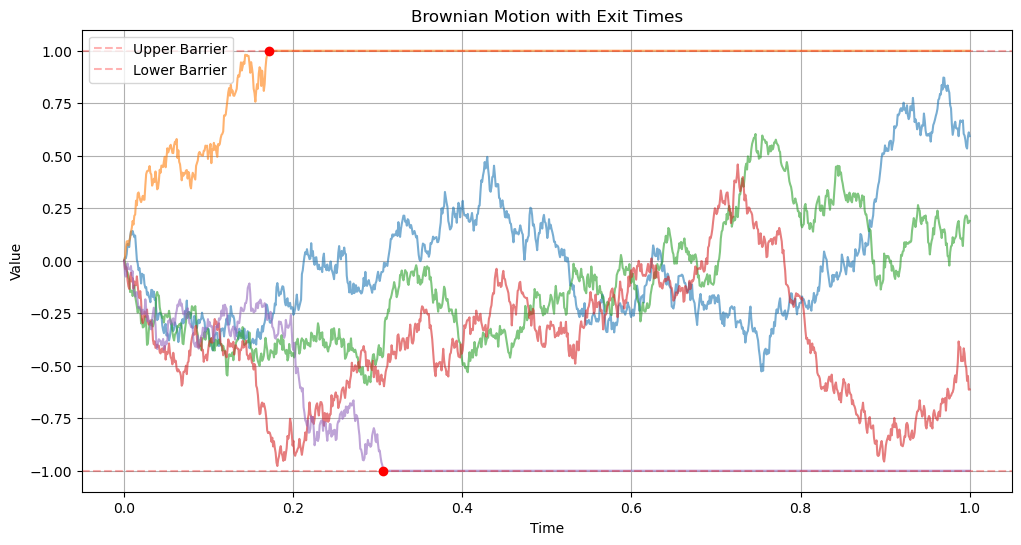

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def simulate_brownian_with_barriers(mu=0, sigma=1, T=1, N=1000, 
                                  upper_barrier=1, lower_barrier=-1):
    """
    Simulate Brownian motion until it hits one of two barriers
    
    Parameters:
    -----------
    mu : float
        Drift parameter
    sigma : float
        Volatility parameter
    T : float
        Maximum time horizon
    N : int
        Number of time steps
    upper_barrier, lower_barrier : float
        Barrier levels
        
    Returns:
    --------
    tuple: (times, path, exit_time, exit_level)
    """
    dt = T/N
    times = np.linspace(0, T, N)
    
    # Generate increments
    dW = np.random.normal(0, np.sqrt(dt), N-1)
    increments = mu*dt + sigma*dW
    
    # Construct path
    path = np.zeros(N)
    exit_time = T
    exit_level = None
    
    for i in range(1, N):
        path[i] = path[i-1] + increments[i-1]
        
        # Check if we've hit a barrier
        if path[i] >= upper_barrier:
            exit_time = times[i]
            exit_level = upper_barrier
            path[i:] = upper_barrier
            break
        elif path[i] <= lower_barrier:
            exit_time = times[i]
            exit_level = lower_barrier
            path[i:] = lower_barrier
            break
    
    return times, path, exit_time, exit_level

# Visualize multiple paths
plt.figure(figsize=(12, 6))
np.random.seed(42)

# Simulate several paths
n_paths = 5
for _ in range(n_paths):
    times, path, exit_time, exit_level = simulate_brownian_with_barriers()
    
    # Plot path
    plt.plot(times, path, alpha=0.6)
    if exit_level is not None:
        plt.plot(exit_time, exit_level, 'ro')

plt.axhline(y=1, color='r', linestyle='--', alpha=0.3, label='Upper Barrier')
plt.axhline(y=-1, color='r', linestyle='--', alpha=0.3, label='Lower Barrier')
plt.title('Brownian Motion with Exit Times')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

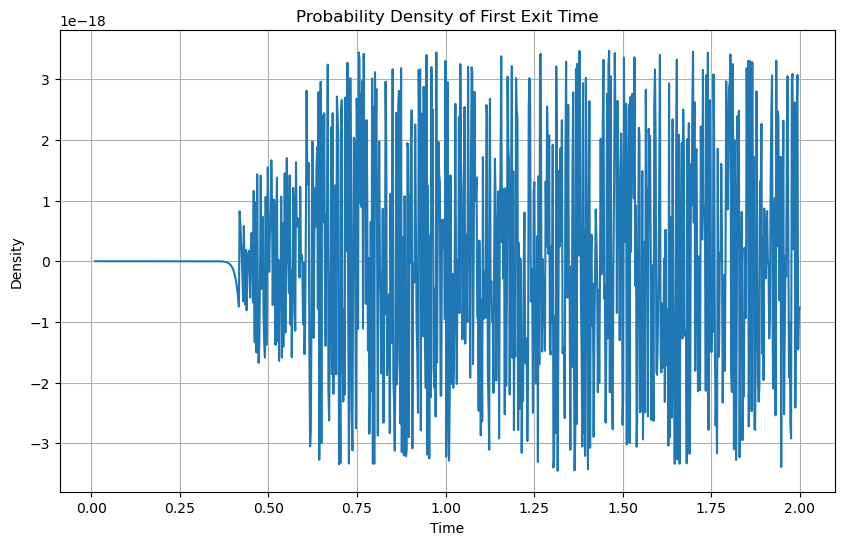

In [8]:
def exit_time_distribution(t, L, U):
    """
    Calculate the probability density of exit time
    
    Parameters:
    -----------
    t : array-like
        Time points
    L, U : float
        Lower and upper barriers
        
    Returns:
    --------
    array-like: Probability density values
    """
    n_terms = 5  # Number of terms in the sum for approximation
    result = np.zeros_like(t, dtype=float)
    
    for n in range(-n_terms, n_terms+1):
        d = U - L - 2*n*(U-L)
        result += (d / (2*np.sqrt(2*np.pi*t**3))) * np.exp(-d**2/(2*t))
    
    return result

# Plot the distribution
t = np.linspace(0.01, 2, 1000)
density = exit_time_distribution(t, -1, 1)

plt.figure(figsize=(10, 6))
plt.plot(t, density)
plt.title('Probability Density of First Exit Time')
plt.xlabel('Time')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [10]:
import numpy as np
from scipy.stats import norm

def probability_hit_upper_first(x0, mu, sigma, upper, lower):
    """
    Calculate probability of hitting upper barrier before lower barrier
    
    Parameters:
    -----------
    x0 : float
        Starting point
    mu : float
        Drift
    sigma : float
        Volatility
    upper, lower : float
        Barrier levels
    """
    if mu == 0:
        # Simple case with no drift
        return (x0 - lower)/(upper - lower)
    else:
        # Case with drift
        exp_term = np.exp(-2*mu*(x0 - lower)/(sigma**2))
        numerator = 1 - exp_term
        denominator = np.exp(-2*mu*(upper - lower)/(sigma**2)) - exp_term
        return numerator/denominator

# Example calculation
prob = probability_hit_upper_first(0, 0.1, 1, 2, -1)
print(f"Probability of hitting upper barrier first: {prob:.4f}")

# Verify with simulation
def simulate_exit_probabilities(n_sims=10000):
    hits_upper = 0
    for _ in range(n_sims):
        x = 0
        while True:
            x += np.random.normal(0.1/np.sqrt(252), 1/np.sqrt(252))
            if x >= 2:
                hits_upper += 1
                break
            elif x <= -1:
                break
    return hits_upper/n_sims

simulated_prob = simulate_exit_probabilities()
print(f"Simulated probability: {simulated_prob:.4f}")

Probability of hitting upper barrier first: -0.6716
Simulated probability: 0.9652


In [11]:
def expected_exit_time(x0, mu, sigma, upper, lower):
    """
    Calculate expected time until hitting either barrier
    """
    if mu == 0:
        return (upper - x0)*(x0 - lower)/(sigma**2)
    else:
        # More complex formula for case with drift
        pass  # Implementation left as exercise

# Example usage
expected_time = expected_exit_time(0, 0, 1, 1, -1)
print(f"Expected exit time: {expected_time}")

Expected exit time: 1.0


In [14]:
T=1
N=1000
paths=5
dt = T/N
dt


0.001

In [16]:
t = np.linspace(0, T, N)
dW = np.random.normal(0, np.sqrt(dt), (paths, N-1))
dW

array([[ 0.00111596,  0.04639614, -0.00818693, ..., -0.02926724,
         0.00993724, -0.02858542],
       [-0.01502419,  0.01631108,  0.02218912, ...,  0.00769746,
         0.01631577,  0.05311752],
       [ 0.0323067 ,  0.01764096, -0.01903653, ...,  0.0541417 ,
         0.02290834,  0.00172242],
       [ 0.0036655 ,  0.0338259 , -0.01200265, ...,  0.0258278 ,
         0.0126279 , -0.00557801],
       [ 0.01259397,  0.0706388 ,  0.01902993, ..., -0.03095261,
        -0.00157527, -0.00145551]])

In [19]:
W = np.cumsum(dW, axis=1)
W.shape

(5, 999)

In [20]:
W = np.concatenate([np.zeros((paths, 1)), W], axis=1)
W.shape

(5, 1000)

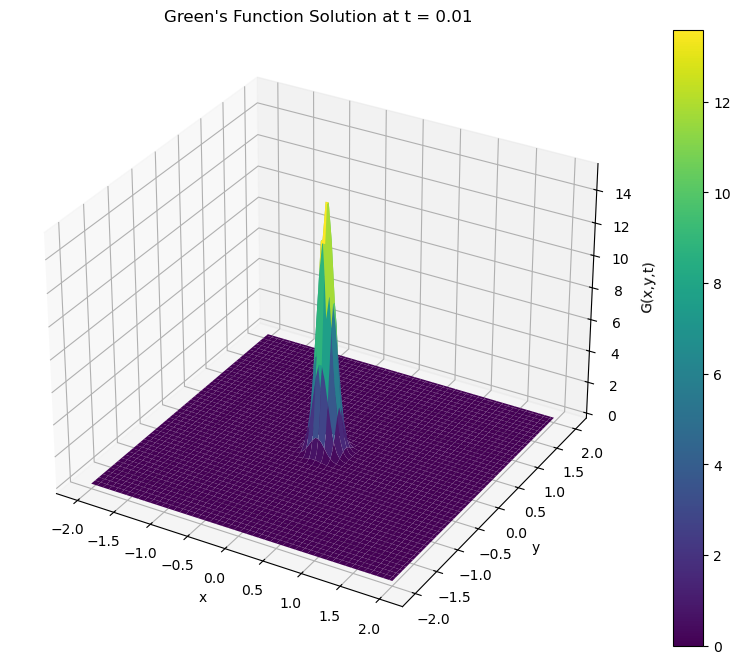

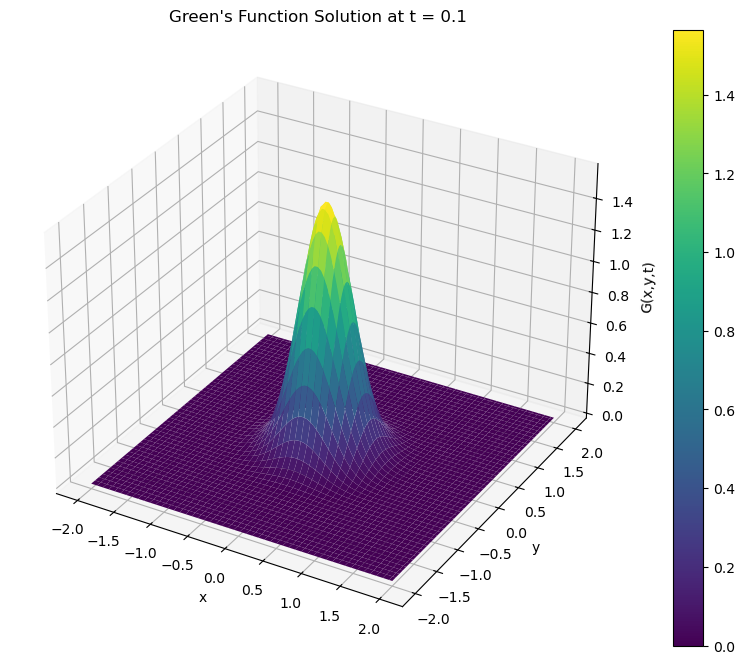

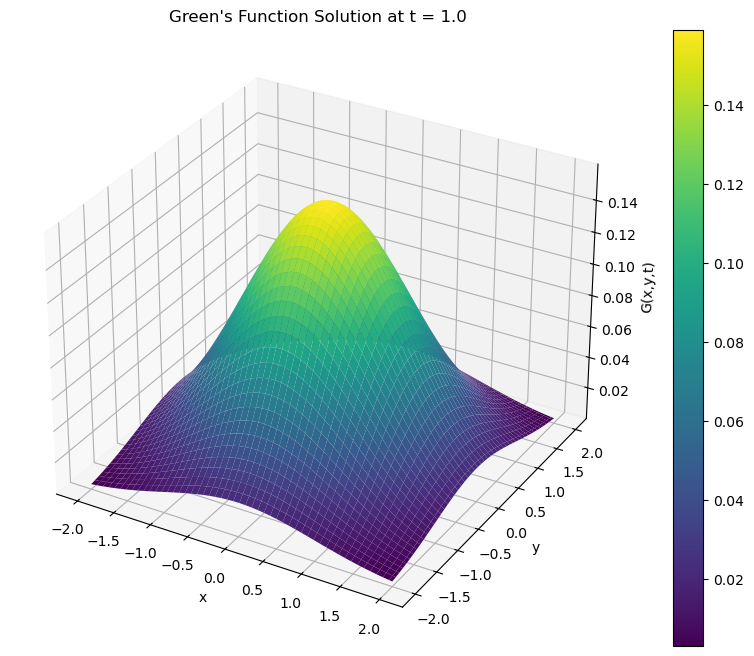

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_greens_function(t=0.1, D=0.5):
    """
    Visualize the Green's function solution at time t
    """
    # Create grid
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    
    # Calculate Green's function
    G = (1/(4*np.pi*D*t)) * np.exp(-(X**2 + Y**2)/(4*D*t))
    
    # 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X, Y, G, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('G(x,y,t)')
    ax.set_title(f'Green\'s Function Solution at t = {t}')
    
    plt.colorbar(surf)
    plt.show()

# Show solution at different times
for t in [0.01, 0.1, 1.0]:
    plot_greens_function(t)

In [26]:

from sympy import symbols, diff, exp, pi
import sympy as sp

def verify_diffusion_equation():
    """
    Symbolic verification that Gaussian satisfies diffusion equation
    """
    # Define symbols
    x, y, t, D = symbols('x y t D')
    
    # Define Green's function
    G = (1/(4*pi*D*t)) * exp(-(x**2 + y**2)/(4*D*t))
    
    # Calculate derivatives
    dt = diff(G, t)
    dx2 = diff(G, x, 2)
    dy2 = diff(G, y, 2)
    
    # Check if equation is satisfied
    equation = dt - D*(dx2 + dy2)
    
    return sp.simplify(equation)

# Verify equation is satisfied (should return 0)
print(verify_diffusion_equation())

0


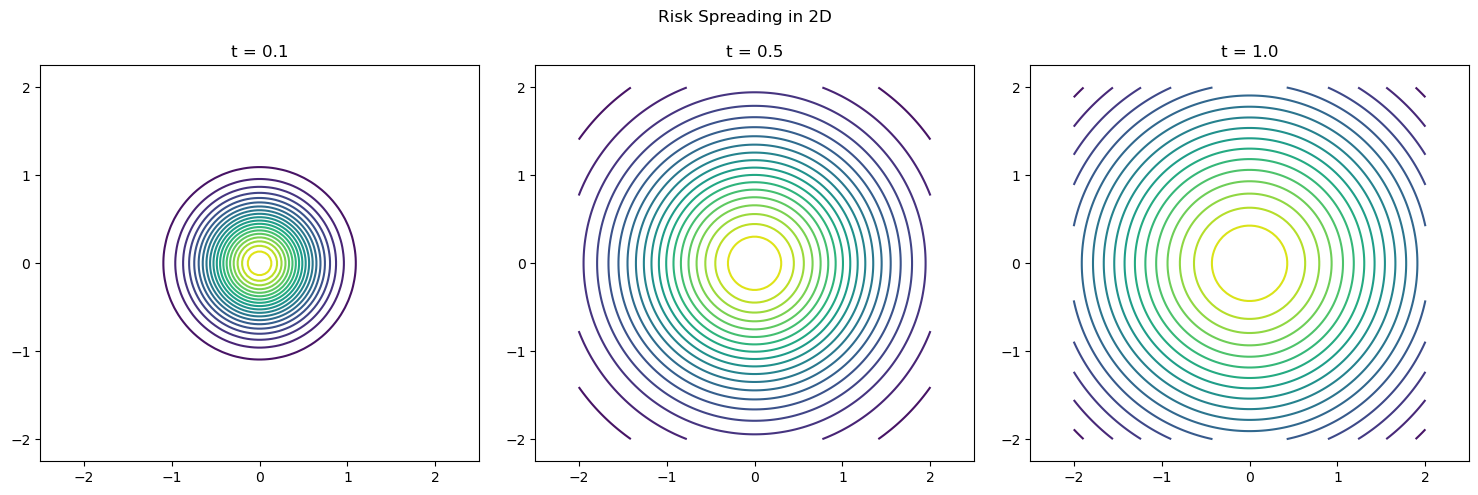

In [29]:
def visualize_risk_spreading():
    """
    Visualize how initial point risk spreads in 2D over time
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    times = [0.1, 0.5, 1.0]
    
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    
    for i, t in enumerate(times):
        G = (1/(4*np.pi*t)) * np.exp(-(X**2 + Y**2)/(4*t))
        
        axes[i].contour(X, Y, G, levels=20)
        axes[i].set_title(f't = {t}')
        axes[i].axis('equal')
    
    plt.suptitle('Risk Spreading in 2D')
    plt.tight_layout()
    plt.show()

visualize_risk_spreading()